In [ ]:

# Climate Action Data Analysis
# Objectives 
# 1. Load and preprocess the dataset
# 2. Inspect the data for empty values, wrong data types, wrong formats, duplicates and outliers
# 3. Analyze the data to find variable relationships
# 4. Visualize   correlations,histograms
# 5. variables most influencing fertiliser recommendation
# 6.crop type with highest average soil moisture
# 7.irrigation suggestions for crops with AVG temp >30
# 8. Save the cleaned and processed data for future use
# 9. document analytical insights and recommendations

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [95]:
df = pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [96]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [97]:

df.describe()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [98]:
df.shape

(913, 10)

In [99]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [100]:
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
print("Missing values after handling:")
print(df.isnull().sum())        

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [103]:
#wrong formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

numeric_cols = [ 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',  'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, coercing errors to NaN
# Fill NaN values in 'Volume' with the median
        df[col] = df[col].fillna(df[col].median())
        
categorical_cols = ['Sensor_ID','Crop_Type','Drone_Image_ID']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])







In [104]:
stat_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',  'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
for col in stat_cols:
    if col in df.columns:
# Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std = df[col].std()
       df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
       df[col] = df[col].fillna(df[col].median())

In [105]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [106]:
df = df.drop_duplicates()
print('number of rows after removing duplicates',df.shape[0])

print('number of duplicate dates:', df['Date'].duplicated().sum())

df = df.drop_duplicates(subset=['Date'],keep='first')

df.shape

number of rows after removing duplicates 802
number of duplicate dates: 3


(799, 10)

In [107]:
df.info()
print("Missing values after all cleaning:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

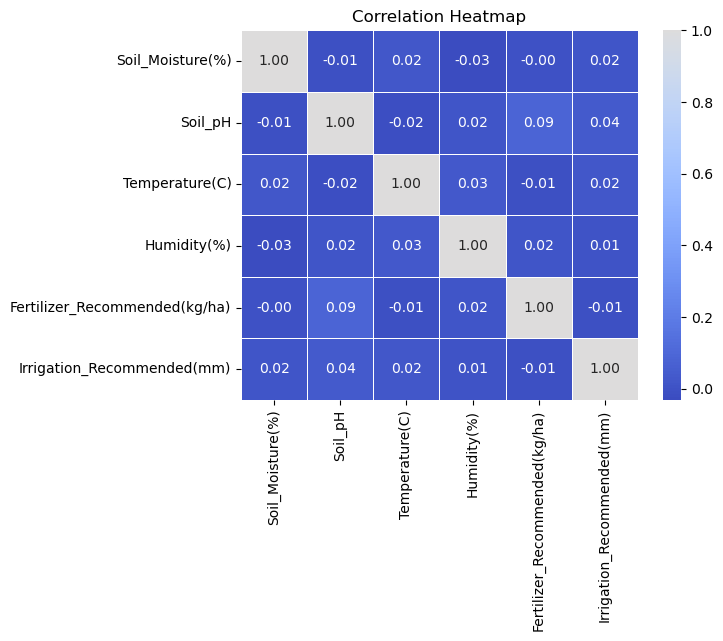

In [ ]:
# Correlation Analysis
numeric_cols= ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',  'Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']
df [numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
corr_matrix = df[numeric_cols].corr()

plt.Figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

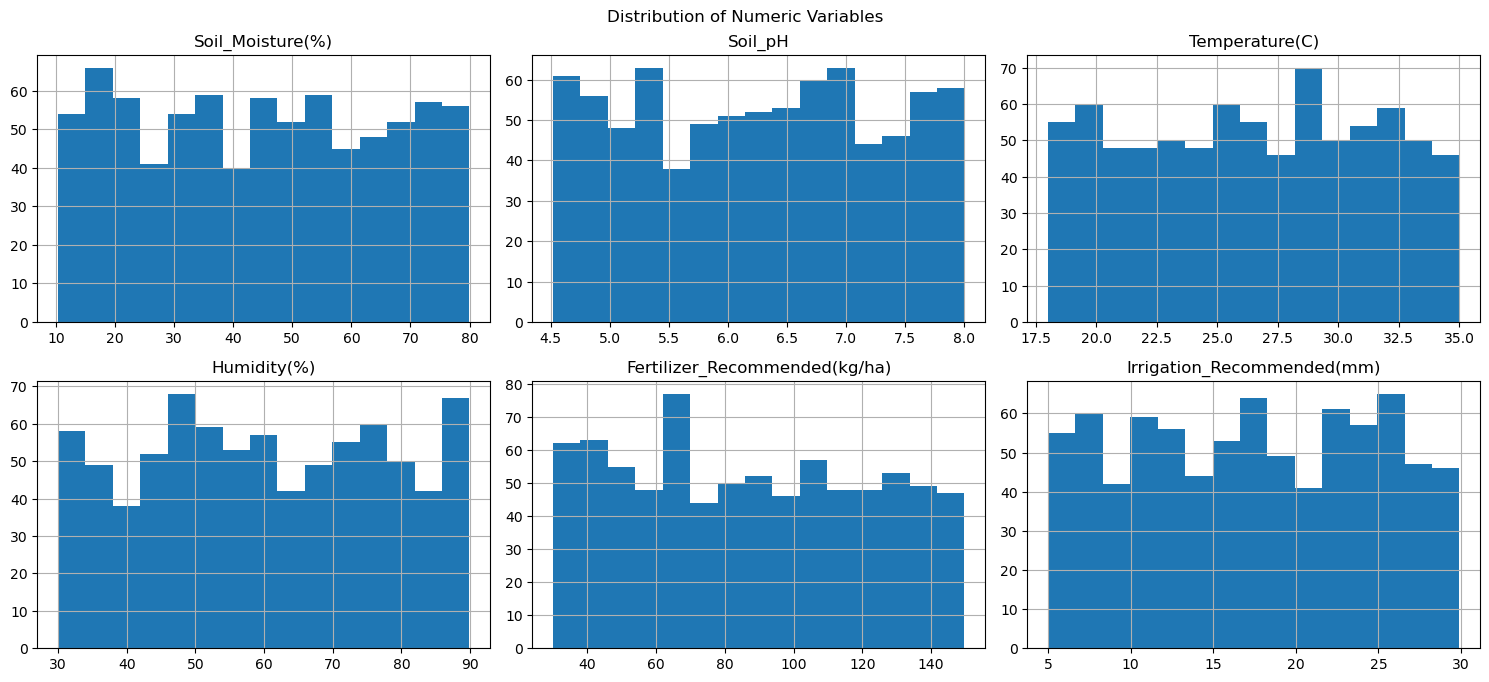

In [ ]:
rams#histog
df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Numeric Variables")
plt.tight_layout()
plt.show()

In [ ]:
#variables most influencing fertiliser recommendation
if 'Fertilizer_Recommended(kg/ha)' in df.columns:
    corr_matrix = df[numeric_cols].corr()
    corr_fert = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
    print("Top variables influencing fertilizer recommendation:")
    print(corr_fert)

Top variables influencing fertilizer recommendation:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085333
Humidity(%)                      0.017329
Soil_Moisture(%)                -0.000944
Temperature(C)                  -0.007332
Irrigation_Recommended(mm)      -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [112]:
#crop type with highest average soil moisture
if 'Crop_Type' in df.columns and 'Soil_Moisture(%)' in df.columns:
    top_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().idxmax()
    print(f"Crop type with highest average soil moisture: {top_crop}")


Crop type with highest average soil moisture: Wheat


In [113]:
#irrigation suggestions for crops with AVG temp >30
if 'Crop_Type' in df.columns and 'Temperature(C)' in df.columns:
    high_temp_crops = df[df['Temperature(C)'] > 30]
    avg_moisture = high_temp_crops.groupby('Crop_Type')['Soil_Moisture(%)'].mean()
    print("Suggested irrigation adjustments for high-temp crops:")
    print(avg_moisture.apply(lambda x: 'Increase' if x < 50 else 'Maintain'))


Suggested irrigation adjustments for high-temp crops:
Crop_Type
Beans       Increase
Lettuce     Increase
Maize       Increase
Tomatoes    Increase
Wheat       Increase
Name: Soil_Moisture(%), dtype: object


In [ ]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
